In [ ]:
pip install tensorflow

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Evaluating the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Load dataset. The model can be adjusted for dataset with variable attributes.
#both datasets can be found at https://www.kaggle.com/datasets/bhuviranga/customer-churn-data and https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset?resource=download respectivaly.
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [ ]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

This dataset contains 12 customer attributes for churn prediction, including:

    Identifiers: customer_id (unique identifier)

    Demographics: country, gender, age

    Financial metrics: credit_score, balance, estimated_salary

    Engagement features: tenure (account age), products_number, credit_card (binary), active_member (binary)

    Target variable: churn (binary classification label)

The structure suggests a tabular dataset typical for customer churn analysis, mixing numerical (age, balance) and categorical (country, gender) features. The presence of customer_id indicates row-level uniqueness, while churn as the last column confirms it's the prediction target.


In [ ]:
df = data[:][['balance', 'products_number', 'credit_score', 'credit_card', 'active_member', 'churn']]

In [ ]:
df

,balance,products_number,credit_score,credit_card,active_member,churn
0,0.00,1,619,1,1,1
1,83807.86,1,608,0,1,0
2,159660.80,3,502,1,0,1
3,0.00,2,699,0,0,0
4,125510.82,1,850,1,1,0
...,...,...,...,...,...,...
9995,0.00,2,771,1,0,0
9996,57369.61,1,516,1,1,0
9997,0.00,1,709,0,1,1
9998,75075.31,2,772,1,0,1


In [ ]:
df['churn'].value_counts()[0], df['churn'].value_counts()[1]

(7963, 2037)

In [ ]:
# Preprocessing
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

This code snippet performs data splitting and standardization for machine learning:

    train_test_split divides the dataset (X, y) into:

        80% training data (X_train, y_train)

        20% testing data (X_test, y_test)

        stratify=y ensures balanced class distribution in both sets

        random_state=42 guarantees reproducible splits

    StandardScaler standardizes features by:

        Calculating mean/std from training data only (fit_transform)

        Applying the same scaling to test data (transform) to avoid data leakage

Key purpose: Prepares data for model training/evaluation by ensuring consistent scales and unbiased splits.

In [ ]:
# Save the array to a file
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

In [ ]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=np.ravel(y_train))

In [ ]:
class_weights

array([0.62794349, 2.45398773])

In [ ]:
# Building ANN model
classifier_ann = Sequential()
classifier_ann.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=5))
classifier_ann.add(Dropout(rate=0.1))
classifier_ann.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
classifier_ann.add(Dropout(rate=0.1))
classifier_ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                96        
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


This code defines a 3-layer artificial neural network (ANN) for binary classification:

    Architecture:

        Input layer: 16 neurons (ReLU activation) for 5 input features

        Hidden layer: 8 neurons (ReLU activation)

        Output layer: 1 neuron (sigmoid activation) for binary prediction

    Regularization:

        Dropout (10%) after each hidden layer to prevent overfitting.

    Training Setup:

        Optimizer: Adam (adaptive learning rate)

        Loss: Binary cross-entropy (suited for yes/no outcomes)

        Metric: Accuracy

    Use Case:

        Designed for tasks like customer churn prediction (outputs probabilities between 0 and 1).

The .summary() call displays the layer structure and parameter count.

(Key: ReLU enables nonlinear learning; sigmoid ensures probabilistic outputs; dropout improves generalization.)

In [ ]:
# Building other models
classifier_rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0, class_weight='balanced')
classifier_svm = SVC(C = 2.8, kernel='sigmoid', random_state=0, probability=True, class_weight='balanced')

This code defines two machine learning models:

Random Forest Classifier (classifier_rf): An ensemble model using 10 decision trees (n_estimators=10). It uses entropy to measure the quality of splits, ensures reproducibility with random_state=0, and addresses class imbalance by automatically adjusting weights based on class frequencies (class_weight='balanced').
Support Vector Machine (classifier_svm): A classification model with a sigmoid kernel for non-linear separation. It has a regularization parameter C of 2.8, ensures reproducibility with random_state=0, is configured to output probability estimates (probability=True), and also handles class imbalance using class_weight='balanced'.

### Fitting the models

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=0)

In [ ]:
classifier_svm.fit(X_train, y_train)

SVC(C=2.8, class_weight='balanced', kernel='sigmoid', probability=True,
    random_state=0)

In [ ]:
classifier_ann.fit(X_train, y_train, batch_size= 16, validation_split=(0.1), epochs=10)

Epoch 1/10
450/450 [==============================] - 3s 4ms/step - loss: 0.5395 - accuracy: 0.7937 - val_loss: 0.4554 - val_accuracy: 0.8100
Epoch 2/10
450/450 [==============================] - 2s 3ms/step - loss: 0.4698 - accuracy: 0.8028 - val_loss: 0.4203 - val_accuracy: 0.8300
Epoch 3/10
450/450 [==============================] - 2s 3ms/step - loss: 0.4424 - accuracy: 0.8140 - val_loss: 0.4002 - val_accuracy: 0.8325
Epoch 4/10
450/450 [==============================] - 1s 3ms/step - loss: 0.4355 - accuracy: 0.8153 - val_loss: 0.3948 - val_accuracy: 0.8325
Epoch 5/10
450/450 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.8144 - val_loss: 0.3905 - val_accuracy: 0.8325
Epoch 6/10
450/450 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.8163 - val_loss: 0.3888 - val_accuracy: 0.8338
Epoch 7/10
450/450 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.8158 - val_loss: 0.3873 - val_accuracy: 0.8325
Epoch 

This line trains your Artificial Neural Network (ANN) model (classifier_ann) using the following settings:

X_train, y_train: The input features and corresponding labels used for training.
batch_size=16: The number of samples processed before updating the model's weights.
validation_split=0.1: 10% of the training data is held out as a validation set to monitor performance during training.
epochs=10: The model will iterate through the entire training dataset 10 times.

In [ ]:
# Combining the models
y_pred_rf = classifier_rf.predict_proba(X_test)[:, 1]
y_pred_svm = classifier_svm.predict_proba(X_test)[:, 1]
y_pred_ann = classifier_ann.predict(X_test)

63/63 [==============================] - 0s 1ms/step


These lines generate probability predictions from the trained models on the test data:

y_pred_rf = classifier_rf.predict_proba(X_test)[:, 1]: Gets the predicted probabilities for the positive class (churn) from the Random Forest classifier. [:, 1] selects the probabilities for the second class (index 1).
y_pred_svm = classifier_svm.predict_proba(X_test)[:, 1]: Gets the predicted probabilities for the positive class (churn) from the Support Vector Machine classifier.
y_pred_ann = classifier_ann.predict(X_test): Gets the predicted probabilities from the Artificial Neural Network. Since the ANN has a single output neuron with a sigmoid activation, the output is already the probability of the positive class.

In [ ]:
# create an empty dataframe with sub-columns
results = pd.DataFrame(columns=['RF', 'SVM', 'ANN', 'RF-SDNN', 'SVC-SDNN'],
                        index=['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc'])

In [ ]:
results

,RF,SVM,ANN,RF-SDNN,SVC-SDNN
accuracy,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN
f1_score,NaN,NaN,NaN,NaN,NaN
auc_roc,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(confusion, classes, normalize=False, title=None, cmap=plt.cm.Blues, save_filename=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(confusion)

    plt.figure(figsize=(8, 6))
    plt.imshow(confusion, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = confusion.max() / 2.
    for i in range(confusion.shape[0]):
        for j in range(confusion.shape[1]):
            plt.text(j, i, format(confusion[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Save the plot if a filename is provided
    if save_filename:
        plt.savefig(save_filename)

# Define class labels (replace with your actual class labels)
class_names = ['Non-Churn', 'Churn']

his Python function plot_confusion_matrix takes a confusion matrix and class names as input and generates a visual representation of the matrix. It can optionally normalize the matrix and save the plot to a file, making it a useful tool for evaluating classification model performance.

#### RF

In [ ]:
# set new values for the 'RF' column
y_pred_rf_ = np.where(y_pred_rf > 0.5, 1, 0)
np.save('y_pred_rf_.npy', y_pred_rf_)
results['RF'] = [accuracy_score(y_test, y_pred_rf_),
                 precision_score(y_test, y_pred_rf_, average='weighted'),
                 recall_score(y_test, y_pred_rf_, average='weighted'),
                 f1_score(y_test, y_pred_rf_, average='weighted'),
                 roc_auc_score(y_test, y_pred_rf_, average='weighted')]

In [ ]:
print(classification_report(y_test, y_pred_rf_))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1593
           1       0.46      0.32      0.38       407

    accuracy                           0.79      2000
   macro avg       0.65      0.61      0.63      2000
weighted avg       0.76      0.79      0.77      2000



In [ ]:
# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_)

Normalized confusion matrix
[[0.9039548  0.0960452 ]
 [0.67567568 0.32432432]]


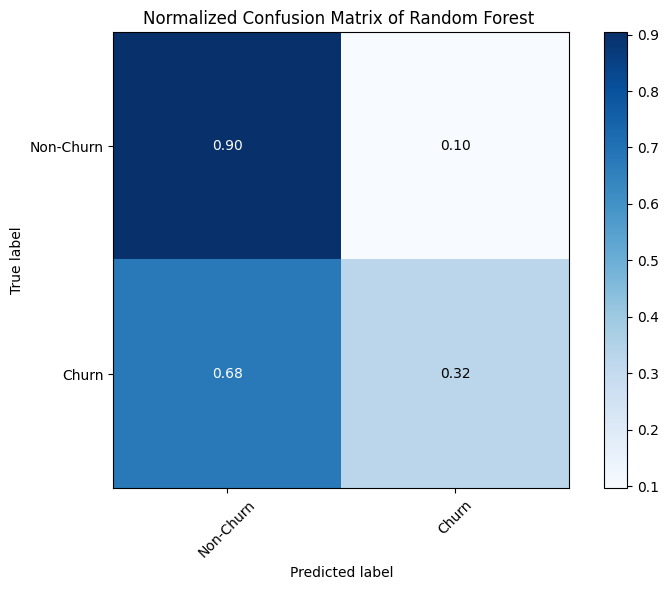

In [ ]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_rf, classes=class_names, normalize=True, title='Normalized Confusion Matrix of Random Forest ', save_filename='norm_cm_random_forest.png')
plt.show()

Confusion matrix, without normalization
[[1440  153]
 [ 275  132]]


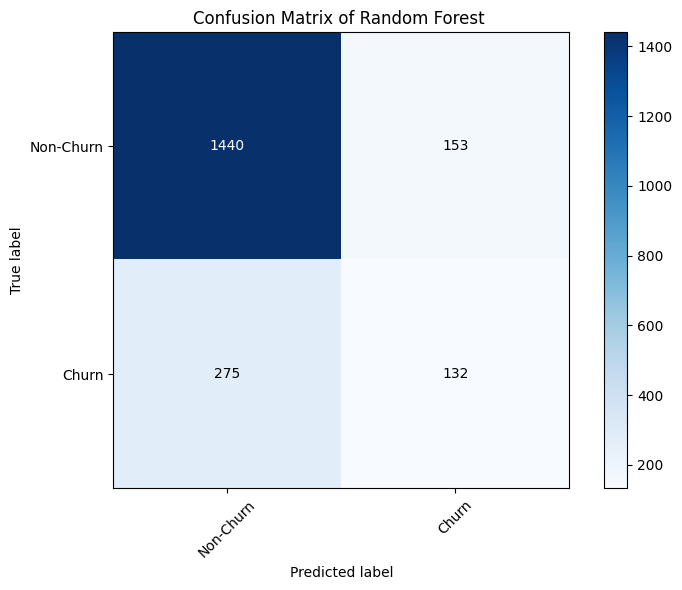

In [ ]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_rf, classes=class_names, normalize=False, title='Confusion Matrix of Random Forest ', save_filename='cm_random_forest.png')
plt.show()

#### SVM

In [ ]:
# set new values for the 'SVM' column
y_pred_svm_ = np.where(y_pred_svm > 0.5, 1, 0)
np.save('y_pred_svm_.npy', y_pred_svm_)
results['SVM'] = [accuracy_score(y_test, y_pred_svm_),
                 precision_score(y_test, y_pred_svm_, average='weighted'),
                 recall_score(y_test, y_pred_svm_, average='weighted'),
                 f1_score(y_test, y_pred_svm_, average='weighted'),
                 roc_auc_score(y_test, y_pred_svm_, average='weighted')]

In [ ]:
print(classification_report(y_test, y_pred_svm_))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1593
           1       0.87      0.11      0.20       407

    accuracy                           0.82      2000
   macro avg       0.84      0.55      0.55      2000
weighted avg       0.82      0.82      0.75      2000



In [ ]:
# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm_)

Normalized confusion matrix
[[0.99560578 0.00439422]
 [0.88943489 0.11056511]]


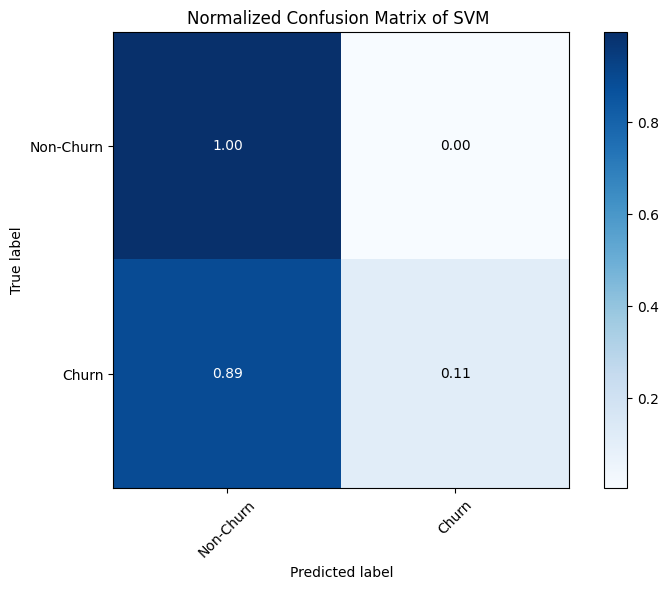

In [ ]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_svm, classes=class_names, normalize=True, title='Normalized Confusion Matrix of SVM ', save_filename='norm_cm_svm.png')
plt.show()

Confusion matrix, without normalization
[[1586    7]
 [ 362   45]]


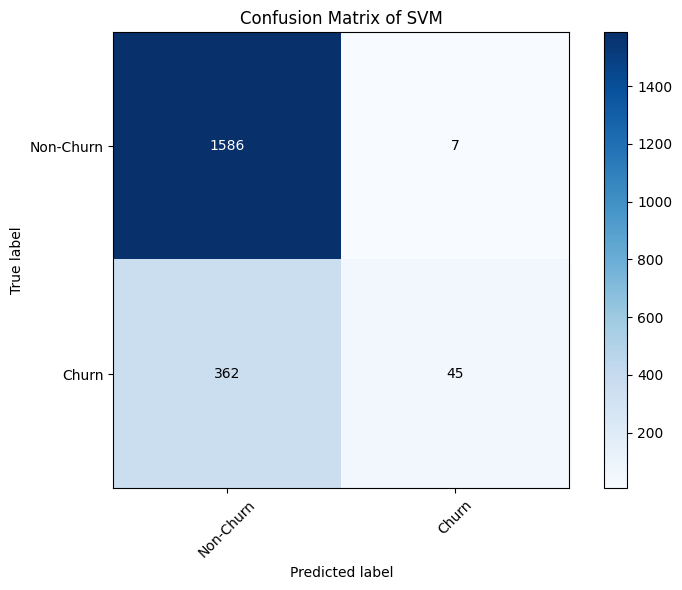

In [ ]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_svm, classes=class_names, normalize=False, title='Confusion Matrix of SVM', save_filename='cm_svm.png')
plt.show()

#### ANN

In [ ]:
# set new values for the 'ANN' column
y_pred_ann_ = np.where(y_pred_ann > 0.5, 1, 0)
np.save('y_pred_ann_.npy', y_pred_ann_)
results['ANN'] = [accuracy_score(y_test, y_pred_ann_),
                 precision_score(y_test, y_pred_ann_, average='weighted'),
                 recall_score(y_test, y_pred_ann_, average='weighted'),
                 f1_score(y_test, y_pred_ann_, average='weighted'),
                 roc_auc_score(y_test, y_pred_ann_, average='weighted')]

In [ ]:
print(classification_report(y_test, y_pred_ann_))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1593
           1       0.87      0.15      0.25       407

    accuracy                           0.82      2000
   macro avg       0.84      0.57      0.58      2000
weighted avg       0.83      0.82      0.77      2000



In [ ]:
# Calculate the confusion matrix
cm_ann = confusion_matrix(y_test, y_pred_ann_)

Normalized confusion matrix
[[0.99435028 0.00564972]
 [0.85257985 0.14742015]]


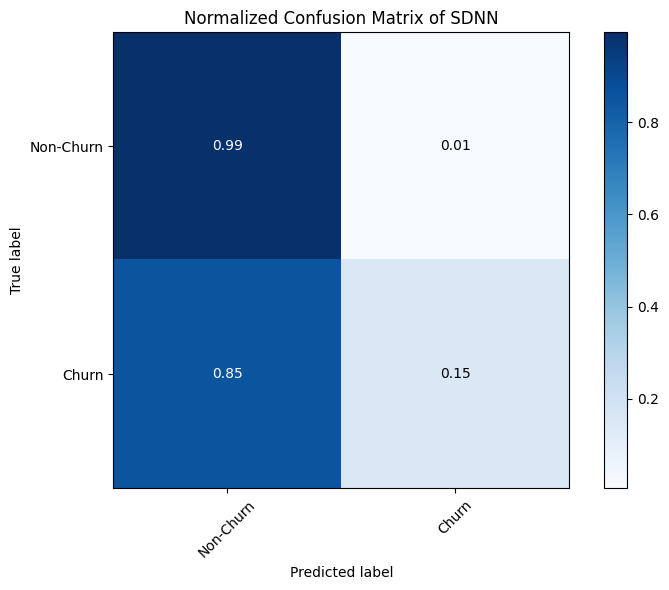

In [ ]:
# Call the function to plot the confusion matrix and save it to a file
#This code generates and displays a normalized confusion matrix plot for the Artificial Neural Network (ANN) model, saving it as 'norm_cm_sdnn.png'.
plot_confusion_matrix(cm_ann, classes=class_names, normalize=True, title='Normalized Confusion Matrix of SDNN', save_filename='norm_cm_sdnn.png')
plt.show()

Confusion matrix, without normalization
[[1584    9]
 [ 347   60]]


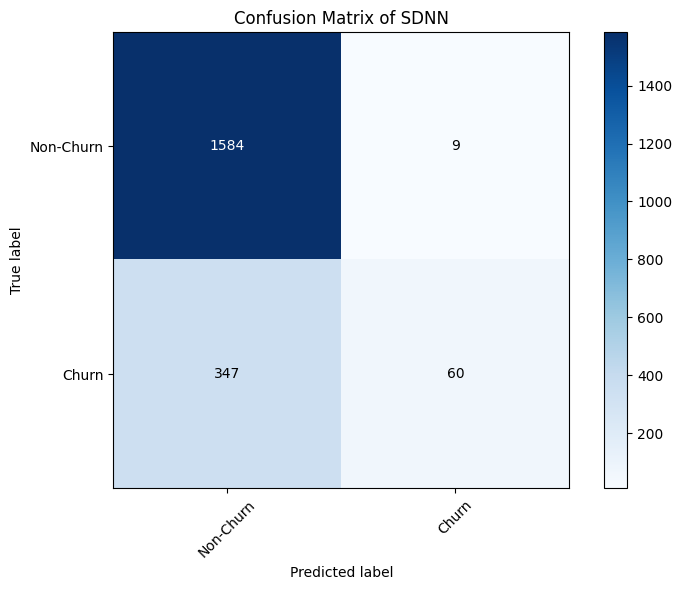

In [ ]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_ann, classes=class_names, normalize=False, title='Confusion Matrix of SDNN', save_filename='cm_sdnn.png')
plt.show()

#### RF-SDNN

In [ ]:
y_pred_rfann = (y_pred_rf + y_pred_ann.flatten()) / 2
# set new values for the 'RFANN' column
y_pred_rfann_ = np.where(y_pred_rfann > 0.5, 1, 0)
np.save('y_pred_rfann_.npy', y_pred_rfann_)
results['RF-SDNN'] = [accuracy_score(y_test, y_pred_rfann_),
                    precision_score(y_test, y_pred_rfann_, average='weighted'),
                    recall_score(y_test, y_pred_rfann_, average='weighted'),
                    f1_score(y_test, y_pred_rfann_, average='weighted'),
                    roc_auc_score(y_test, y_pred_rfann_, average='weighted')]

In [ ]:
print(classification_report(y_test, y_pred_rfann_))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1593
           1       0.61      0.27      0.38       407

    accuracy                           0.82      2000
   macro avg       0.73      0.61      0.63      2000
weighted avg       0.79      0.82      0.79      2000



In [ ]:
# Calculate the confusion matrix
cm_rf_ann = confusion_matrix(y_test, y_pred_rfann_)

Normalized confusion matrix
[[0.9566855  0.0433145 ]
 [0.72972973 0.27027027]]


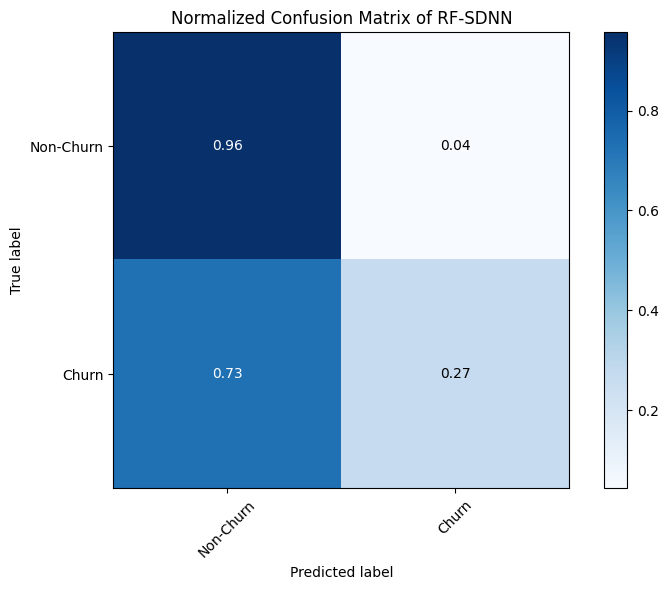

In [ ]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_rf_ann, classes=class_names, normalize=True, title='Normalized Confusion Matrix of RF-SDNN', save_filename='norm_cm_rf_sdnn.png')
plt.show()

Confusion matrix, without normalization
[[1524   69]
 [ 297  110]]


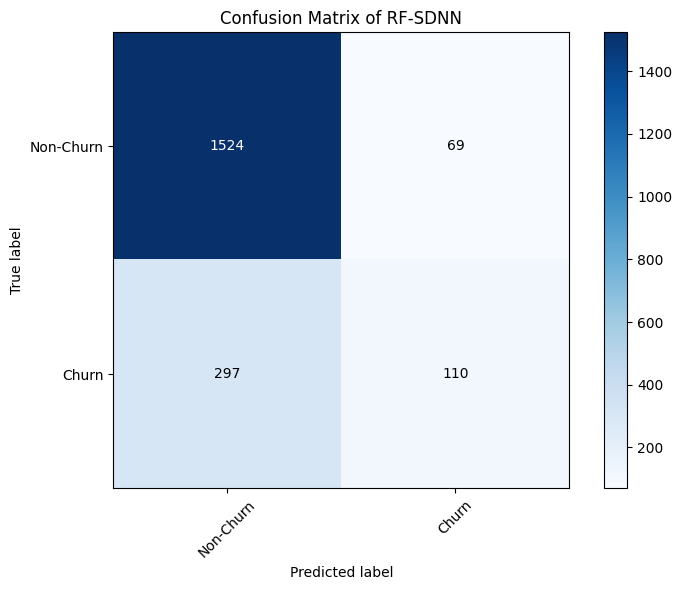

In [ ]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_rf_ann, classes=class_names, normalize=False, title='Confusion Matrix of RF-SDNN', save_filename='cm_rf_sdnn.png')
plt.show()

#### SVMANN

In [ ]:
y_pred_svmann = (y_pred_svm + y_pred_ann.flatten()) / 2
# set new values for the 'SVC-SDNN' column
y_pred_svmann_ = np.where(y_pred_svmann > 0.5, 1, 0)
np.save('y_pred_svmann_.npy', y_pred_svmann_)
results['SVC-SDNN'] = [accuracy_score(y_test, y_pred_svmann_),
                    precision_score(y_test, y_pred_svmann_, average='weighted'),
                    recall_score(y_test, y_pred_svmann_, average='weighted'),
                    f1_score(y_test, y_pred_svmann_, average='weighted'),
                    roc_auc_score(y_test, y_pred_svmann_, average='weighted')]

This code block calculates the average probability predictions from the SVM and ANN models (y_pred_svmann) and converts these probabilities into binary class predictions (y_pred_svmann_) by applying a threshold of 0.5. It then evaluates the performance of this combined prediction using several metrics (accuracy, precision, recall, f1_score, and AUC) and stores these results in the 'SVC-SDNN' column of the results DataFrame.

In [ ]:
print(classification_report(y_test, y_pred_svmann_))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1593
           1       0.87      0.14      0.25       407

    accuracy                           0.82      2000
   macro avg       0.84      0.57      0.57      2000
weighted avg       0.83      0.82      0.77      2000



In [ ]:
# Calculate the confusion matrix
cm_svmann = confusion_matrix(y_test, y_pred_svmann_)

Normalized confusion matrix
[[0.99435028 0.00564972]
 [0.85503686 0.14496314]]


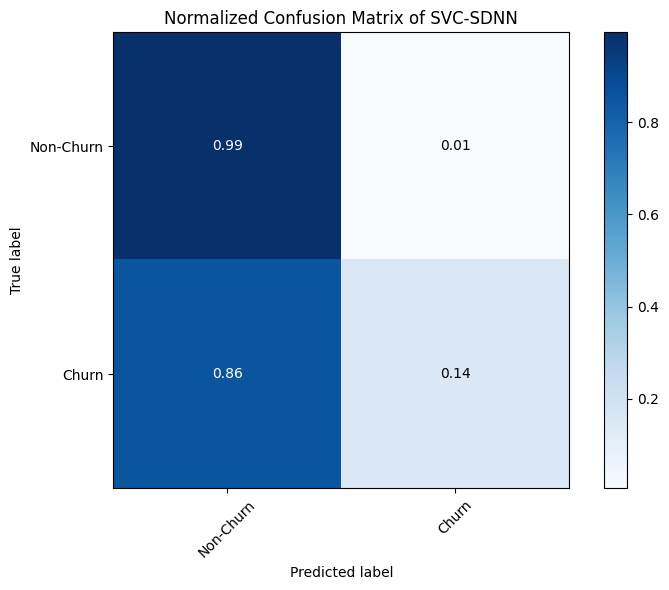

In [ ]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_svmann, classes=class_names, normalize=True, title='Normalized Confusion Matrix of SVC-SDNN', save_filename='norm_cm_svc_sdnn.png')
plt.show()

Confusion matrix, without normalization
[[1584    9]
 [ 348   59]]


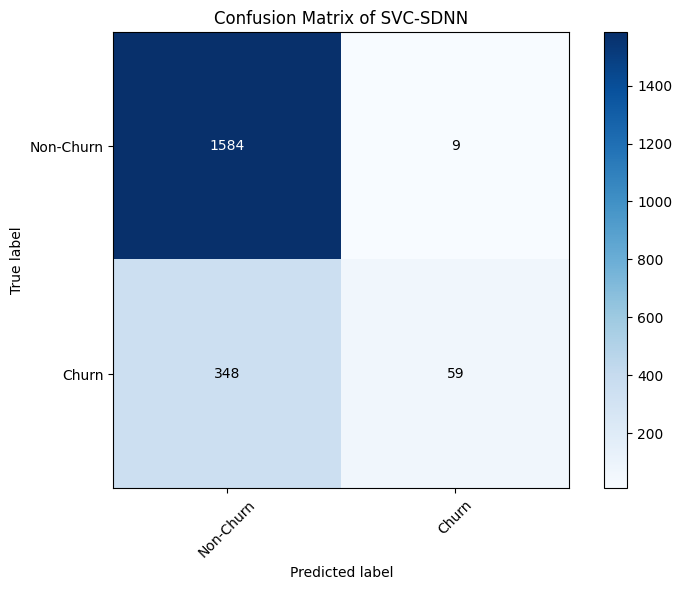

In [ ]:
# Call the function to plot the confusion matrix and save it to a file
plot_confusion_matrix(cm_svmann, classes=class_names, normalize=False, title='Confusion Matrix of SVC-SDNN', save_filename='cm_svc_sdnn.png')
plt.show()

In [ ]:
results

NameError: ignored

In [ ]:
# save the dataframe to a csv file
results.to_csv('results.csv')